### Problem Set 2

#### 1(a). A histogram of percentages of incomes

In [199]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
incomes = np.loadtxt('incomes.txt')
incomes

array([  53711.54439888,   99731.23334901,   84773.60541676,
         75184.025931  ,   73390.9559334 ,   77276.56474964,
         82597.32702898,   76098.11372822,   91850.97696668,
         71750.0904012 ,   78839.14719934,   76488.842497  ,
         98425.21508839,   89179.46995662,   69270.14146077,
         98745.58813476,   99678.12106606,  130562.89791757,
         96611.47162489,  107722.74557525,   89815.6930569 ,
         64096.00766797,  100953.33883423,  139079.35154872,
         56620.60756267,   93887.32671771,   54443.1018241 ,
         72214.43571941,   85334.16381855,   78259.71280733,
         83023.40314506,   88219.63714926,   87329.86039444,
         89740.87145837,   71486.02524282,   55951.62544771,
         66967.80460396,   85265.54454384,  126226.62999114,
        110291.25329238,   81804.83284175,   72162.4456693 ,
         68229.92749973,   86750.35322317,  118823.56074404,
        108877.93206918,   64915.4289308 ,  100934.6283851 ,
         64519.54919916,

In [201]:
incomes.max()
incomes.shape

(200,)

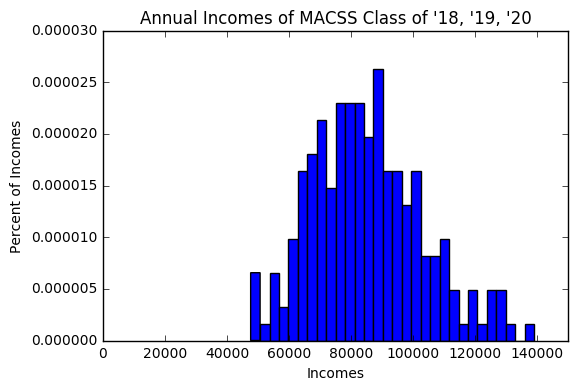

In [202]:
fig, ax = plt.subplots()

def plot_1a():
    plt.hist(incomes, 30, normed = True)
    
plot_1a()
plt.xlim(0, 150000)
plt.title("Annual Incomes of MACSS Class of '18, '19, '20")
plt.xlabel('Incomes')
plt.ylabel('Percent of Incomes')

#### 1(b). Plot the lognormal pdf

In [203]:
import scipy.stats as sts

In [204]:
mu_1b, sigma_1b = 9.0, 0.3
x_linspace = np.linspace(0, 150000, 500)

If the random variable X is log-normally distributed, then 
$Y=\ln(X)$ has a normal distribution. Likewise, if Y has a normal distribution, then $X=\exp(Y)$ has a log-normal distribution.

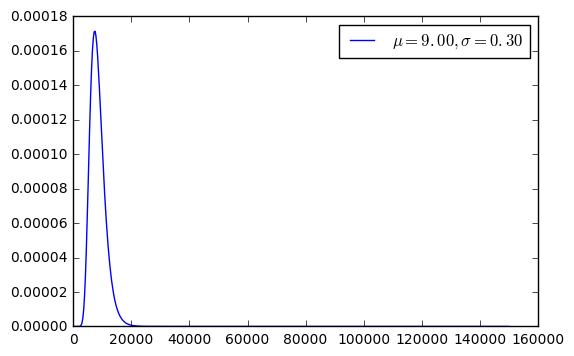

In [205]:
fig, ax = plt.subplots()

def plot_1b():
    plt.plot(x_linspace, sts.lognorm.pdf(x_linspace, s = sigma_1b, scale = 
                                    np.exp(mu_1b)),
            label = '$\mu = {:.2f}, \sigma = {:.2f}$'.format(mu_1b, sigma_1b))
    # `s` stands for sigma
    
plot_1b()
plt.legend(loc = 'best')

In [206]:
def log_lik_norm(xvals, mu, sigma):
    pdf_vals = sts.lognorm.pdf(xvals, s = sigma, scale = np.exp(mu))
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log likelihood value for this parameterization and data is:')
print(log_lik_norm(incomes, mu_1b, sigma_1b))

Log likelihood value for this parameterization and data is:
-8298.63695601


#### 1(c). Estimate the parameters by MLE, report the estimates and the VCV matrix

In [207]:
import scipy.optimize as opt

In [208]:
def crit(params, *args):
    mu, sigma = params
    xvals = args
    log_lik_val = log_lik_norm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

* Guess the initial values

In [209]:
print(incomes.mean(), incomes.std())
print(np.log(np.array([incomes.mean(), incomes.std()])))

85276.8236063 17992.542128
[ 11.35365799   9.79771262]


(0, 150000)

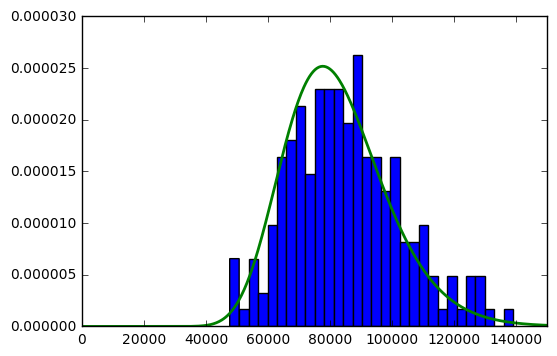

In [210]:
test_mu, test_sigma = 11.3, 0.2

fig, ax = plt.subplots()
plt.hist(incomes, 30, normed = True)
plt.plot(x_linspace, sts.lognorm.pdf(x_linspace, s = test_sigma, scale = 
                                    np.exp(test_mu)), lw = 2)

plt.xlim(0, 150000)

In [211]:
mu_init = 11.3
sig_init = 0.2
params_init = np.array([mu_init, sig_init])
mle_args = incomes
results = opt.minimize(crit, params_init, args = mle_args)
mu_MLE, sig_MLE = results.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mu_MLE= 11.3314403294  sig_MLE= 0.211674581429


In [212]:
results

      fun: 2239.534743998006
 hess_inv: array([[ 0.00020319, -0.00012467],
       [-0.00012467,  0.00012139]])
      jac: array([ 0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 8
     njev: 15
   status: 0
  success: True
        x: array([ 11.33144033,   0.21167458])

\# The value of `results['fun']` is the negative in this case

In [213]:
print('The value of the likelihood function: ',
      log_lik_norm(incomes, mu_MLE, sig_MLE))

The value of the likelihood function:  -2239.534744


In [214]:
vcv_mle = results.hess_inv
print('VCV matrix:')
print(vcv_mle)

VCV matrix:
[[ 0.00020319 -0.00012467]
 [-0.00012467  0.00012139]]


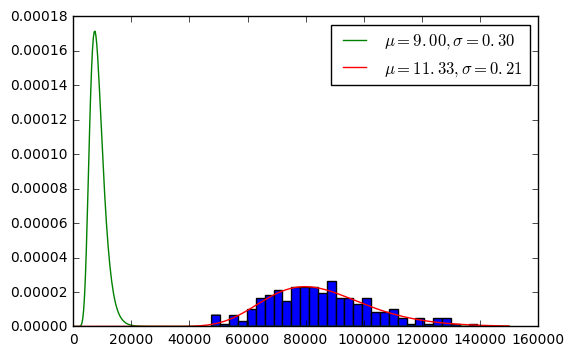

In [215]:
fig, ax = plt.subplots()

plot_1a()
plot_1b()
plt.plot(x_linspace, sts.lognorm.pdf(x_linspace, s = sig_MLE, scale = 
                                    np.exp(mu_MLE)),
            label = '$\mu = {:.2f}, \sigma = {:.2f}$'.format(mu_MLE, sig_MLE))
plt.legend(loc = 'best')

#### 1(d). Likelihood ratio test

In [216]:
log_lik_h0 = log_lik_norm(incomes, mu_1b, sigma_1b)
log_lik_mle = log_lik_norm(incomes, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)  # The second para is the df

print('p-value of the LR test: {:.10f}'.format(pval_h0))

p-value of the LR test: 0.0000000000


#### 1(e). The prob of earning more than 100,000 or less than 75,000

In [217]:
print('Prob of earning less than 75,000: ',
      sts.lognorm.cdf(75000, s = sig_MLE, scale = np.exp(mu_MLE)))

Prob of earning less than 75,000:  0.307939615728


In [218]:
print('Prob of earning more than 100,000: ',
      1 - sts.lognorm.cdf(100000, s = sig_MLE, scale = np.exp(mu_MLE)))

Prob of earning more than 100,000:  0.195617998589


In [219]:
print(mu_MLE, sig_MLE)

11.3314403294 0.211674581429


#### extra: 3D plot of the criterion function

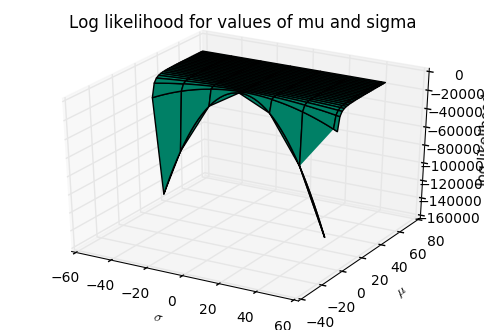

In [220]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

mu_vals = np.linspace(mu_MLE - 50, mu_MLE + 50, 50)
sig_vals = np.linspace(sig_MLE - 50, sig_MLE + 50, 50)
lnlik_vals = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        lnlik_vals[mu_ind, sig_ind] = log_lik_norm(incomes, mu_vals[mu_ind],
                                                   sig_vals[sig_ind])

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, lnlik_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Log likelihood for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'log likelihood')

### Q2. OLS estimation using MLE

#### 2(a). Estimate outcomes, value of the log likelihood func, VCV matrix

In [221]:
import pandas as pd

In [222]:
sick = pd.read_csv('sick.txt')
sick.rename(columns = {'\ufeffsick': 'sick'}, inplace = True)
sick.columns

Index(['sick', 'age', 'children', 'avgtemp_winter'], dtype='object')

In [223]:
def norm_pdf(xvals, mu, sigma):
    pdf_vals    = (1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2)))
    
    return pdf_vals

In [224]:
def log_lik_ols(sick, b0, b1, b2, b3, sigma_ols):
    xvals = sick.sick - b0 - b1*sick.age - b2*sick.children - \
              b3*sick.avgtemp_winter
    pdf_vals = norm_pdf(xvals, 0, sigma_ols)
    #pdf_vals = sts.norm.pdf(xvals, 0, sigma_ols)
    #pdf_vals = sts.lognorm.pdf(xvals, s = sigma_ols, scale = np.exp(0))
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [225]:
def crit(params, *args):
    b0, b1, b2, b3, sigma_ols = params
    sick = args[0]
    log_lik_val = log_lik_ols(sick, b0, b1, b2, b3, sigma_ols)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [226]:
b0_init, b1_init, b2_init, b3_init = 0.0, 0.0, 0.0, 0.0
sigma_ols_init = 0.1

params_init = np.array([b0_init, b1_init, b2_init, b3_init, sigma_ols_init])
mle_args = sick
results1 = opt.minimize(crit, params_init, args = mle_args)
results1

      fun: -876.8650649861532
 hess_inv: array([[  6.41497199e-07,  -2.71857992e-09,  -4.75566251e-08,
         -8.91104854e-09,  -3.46835348e-09],
       [ -2.71857992e-09,   2.99140897e-09,  -2.71213758e-08,
         -1.67483907e-09,   1.18280376e-09],
       [ -4.75566251e-08,  -2.71213758e-08,   2.82593790e-07,
          1.53169655e-08,  -1.23778613e-08],
       [ -8.91104854e-09,  -1.67483907e-09,   1.53169655e-08,
          1.16298211e-09,  -5.03027815e-10],
       [ -3.46835348e-09,   1.18280376e-09,  -1.23778613e-08,
         -5.03027815e-10,   1.83823414e-08]])
      jac: array([   4.18345642,  225.44781494,   -1.96592712,  309.35083771,
         12.5634613 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 2128
      nit: 41
     njev: 301
   status: 2
  success: False
        x: array([ 0.25164576,  0.01293359,  0.40049954, -0.00999178,  0.00301797])

\# If no bounds given, the opt.minimize(method = 'BFGS') by default

\# Because `sigma` can't be negative, therefore we need to provide bounds and specific optimize method (`L-BFGS-B / SLSQP / TNC`). But only `L-BFGS-B` give you `hess_inv`.

In [227]:
bounds = ((None, None),(None, None),(None, None),(None, None),(1e-30, None))

In [228]:
results = opt.minimize(crit, params_init, args = mle_args, 
                       method = 'SLSQP',
                       bounds = bounds)
results

     fun: -654.7373969016986
     jac: array([   -27.55651093,  -1455.33712006,    -21.77033997,  -2225.80555725,
        12954.79131317,      0.        ])
 message: 'Positive directional derivative for linesearch'
    nfev: 426
     nit: 43
    njev: 39
  status: 8
 success: False
       x: array([ 0.25198752,  0.01294152,  0.40045091, -0.0100057 ,  0.01479517])

In [229]:
params_init = results.x
results = opt.minimize(crit, params_init, args = mle_args, 
                       method = 'L-BFGS-B',
                       bounds = bounds)
results

      fun: -654.7373969016986
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([   -27.55876949,  -1459.32597206,    -21.77864644,  -2230.42301286,
        12954.79326018])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 1
   status: 0
  success: True
        x: array([ 0.25198752,  0.01294152,  0.40045091, -0.0100057 ,  0.01479517])

In [230]:
print('The estimates for b0, b1, b2, b3, sigma are as follows: ')
print(results.x)

The estimates for b0, b1, b2, b3, sigma are as follows: 
[ 0.25198752  0.01294152  0.40045091 -0.0100057   0.01479517]


In [231]:
print('The VCV matrix is as follows: ')
results.hess_inv.todense()

The VCV matrix is as follows: 


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

**Therefore, if not success, try either**
1. Plug `results.x` into `opt.minimize()` as `params_init` and run again, or
2. Change the method and provide bounds


#### 2(b). LR test

In [232]:
log_lik_h0 = log_lik_ols(sick, 1.0, 0.0, 0.0, 0.0, 0.1)

b0, b1, b2, b3, sigma_ols = results.x
log_lik_mle = log_lik_ols(sick, *results.x)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)  # The second para is the df

print('p-value of the LR test: {:.10f}'.format(pval_h0))

p-value of the LR test: 0.0000000000
